## Abstract

The main aim of this project is to conduct a comparative analysis of two similar clustering algorithms - K-means clustering and hierachical clustering, in order to identify high-risk diabetic patients. The aim is to examine how accurately these algorithms are able to segment patient data into meaningful clusters that differentiate patients based on their risk levels. 

For this project, the diabetes dataset from the scikit-learn library is used and dimentionality-reduced using the PCA (Principal Component Analysis) algorithm. This dataset comprises various medical attributes of dibetic patients. The study aims to apply both clustering algorithms independently. Each algorithm's ability to separate out high-risk patient gorups will be compared. 

## Introduction

Diabetes is a medical condition that poses significant health challenge globally. It is necesary to effectively manage diabetes through early detection of high-risk patients to prevent complications from the condition. Therefore, clustering algorithms are helpful in identifying the profile of the highest risk patients (e.g. mean blood pressure, mean BMI etc for the highest mean diabetes progression value), so that the most effective preventive treatments can be introduced to these patients as soon as they are identified. 

The diabetes dataset from the scikit-learn library is used for the purpose of this project. Each row represents one patient's medical data, with the following 10 features: Age, 
Sex, 
BMI (Body Mass Index), 
Blood Pressure (BP), 
S1 (total serum cholesterol), 
S2 (LDL: low-density lipoproteins, often considered 'bad cholesterol', 
S3 (HDL: High-density lipoproteins), often considered 'good cholesterol', 
S4 (TCH: Total cholesterol / HDL), 
S5 (LTG: log of serum triglycerides level) and 
S6 (GLU: blood sugar level). 

The target of the diabetes dataset, meaining the label in the context of machine learning, is the progression of diabetes one year after the measurements of these features. The nature of the targets makes it an ideal measure to represent the level of risk of diabetes. 

The main problem with this dataset is that it contains 10 features or dimensions, making it challenging to be plotted the data on a chart and visualised. Therefore, it is crucial that this dataset is reduced for more feasible analysis, in a way that preserves its variability and "meaning". The best way to do that is to have its dimensions reduced using the PCA algorithm. Once that is done, clustering will be carried out independently with K-means clustering and hierachical clustering.  Then, the mean reduced features from the profiles of the highest risk patients from these two algorithms will be compared. 


## Background and data pre-processing

In this project, the PCA algorithm is used to reduce the 10 features of the diabetes dataset into just two principal components. The principal components are the combinations of these 10 features. Each principal component is made up from the different weights of these aforementioned features of the dataset. The first principal component represents the biggest pattern or variability in the data, while the second shows us the second most important pattern in the data. When the principal components are calculated below, the weights are printed out to give a better illustration. 

The PCA algorithm works by first creating a covariance matrix of the dataset, which is a key part of PCA. The covariance matrix shows the relationships between each of the 10 features in our dataset. It tells us how these features vary together. For example, if two features increase together, this relationship is captured in the covariance.

From the covariance matrix, the PCA calculates the eigenvalues and eigenvectors. Eigenvalues help us to comprehend how much variability or variance is captures by each principal component. The higher the eigenvalue, the more variance that component captures. Eigenvectors on the other hand, are like directions in the data. Each eigenvector points towards a direction where there is a lot of variance. These eigenvectors determine the weights used for creating the principal components.

The corresponding eigenvectors of these highest eigenvalues give us the directions for our components. These directions/eigenvectors come with a set of weights for each of the original feature. The loadings in PCA tell how much each original data point (variable) contribute to each principal component. The loadings in PCA have been printed in the code section below.

Then, the first two highest eigenvalues are chosen as they explain the most variance in our data. Therefore, we get a dataset with two most important dimensions that still preserve the most important pattern.

Once the diabetes dataset has been pre-processed and has its number of dimensions reduced to only two principal components, we can start to implement unsupervised learning.

Let's start by implementing the pre-processing task with the PCA algorithm. First, we need to import all the necessary data and libraries:



In [339]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
import numpy as np
import random


#load the diabetes dataset
diabetes = datasets.load_diabetes()



We can now implement the PCA algorithm to reduce the dimension of the dataset to only two principal components and then print their respective loadings:

In [340]:
'''
As I'm using PCA as a precursor to K-means clustering, which is an unsupervised learning algorithm, 
splitting between testing and training data is not necesary. 
This is because my aim is not to build a predictive model, 
but rather I am analysing the structrue and patterns of the data. 
Then comparing different clustering algos
'''

reduced_dimensions = 2

pca_function = PCA(n_components=reduced_dimensions, whiten=True, svd_solver='randomized')
pca_data = pca_function.fit_transform(diabetes.data)


loadings = pca_function.components_
print("PCA Loadings:\n", loadings)
# print("PCA data:\n", pca_data)
# print("target:\n", diabetes.target)
# print("full data:\n", diabetes)



PCA Loadings:
 [[ 0.21643101  0.18696711  0.3031625   0.2717397   0.34325493  0.35186062
  -0.28243639  0.42883325  0.37861731  0.32218282]
 [ 0.04437151 -0.38654811 -0.15628061 -0.13825564  0.57302669  0.45593985
   0.50624287 -0.06818423 -0.0261893  -0.0849466 ]]


## Methodology

The K-means algorithm has been coded from scratch in this project. K-means algorithm is like a method for creating clusters from data. It divides the data into a specified K-number of clusters. The algorithm works by finding the centre point or centroid of each cluster. then it puts each data point in the group with the shortest-distanced centroid. It keeps adjusting until the best grouping is found.

We can start by implementing this algorithm from scratch. First, let's import all the necessary libraries and load the sklearn diabetes library:

In [341]:
#kmeans algo

class Kmeans():
    def __init__(self, K, data):
        self.K = K
        
        #dict to store clusters
        self.clusters = {}
        
        #list to store centroids
        self.cents = []
        
        #place a limit on the while loop to detect convergence as absolute convergence may not occur. 
        #We want to avoid infinite loop
        self.iter_limit = 1000
        
        self.data = data
        
        
    def initialise(self):
        #initialise the centroids
        centIndices = random.sample(range(len(self.data)), self.K)
        
        #append the values of centroids onto self.cents
        #empty list for centroid values
        self.cents = []

        #iterate over each index in centIndices
        for index in centIndices:
            #get data point at the current index
            centroid = self.data[index]
            #add centroid to the self.cents list
            self.cents.append(centroid)

        
        #create the self.clusters dict
        for cent in self.cents:
            self.clusters[tuple(cent)] = []
            
        #allocate data points to clusters
        for dp in self.data:    
            
            #empty dict for distances
            distances = {}

            #go through each centroid in self.cents
            for cent in self.cents:
                #make the centroid a tuple
                cent_as_tuple = tuple(cent)

                #calculate distance between centroid and datapoint
                distance = self.calculate_distance(cent, dp)

                #add tuple/centroid and its calculated distance to the distances dict
                distances[cent_as_tuple] = distance

            #this gets the smallest key a.ka cent with the smallest distance
            nearest_cent = min(distances, key=distances.get)
            self.clusters[nearest_cent].append(dp)
            
            
    #allocate the data points to the centroids    
    def allocate_clusters(self):
        #reset the current self.clusters
        self.clusters = {}
        for cent in self.cents:
            cent_as_tuple = tuple(cent)
            #add empty list for this centroid in the self.clusters dictionary
            self.clusters[cent_as_tuple] = []

        
        #allocate each data point to the nearest cent
        for dp in self.data:
            
            #empty dict for distances
            distances = {}

            for cent in self.cents:
                cent_as_tuple = tuple(cent)
                
                #calculate distance between the centroid and the data point
                distance = self.calculate_distance(cent, dp)

                #add this distance to dict with centroid tuple as key
                distances[cent_as_tuple] = distance

            nearest_cent = min(distances, key=distances.get)
            self.clusters[nearest_cent].append(dp)
        
                
    #after allocating the clusters based on the new means, we recalculate the new means based on the new clusters
    def update_cents(self):
        #container to put the newly calculated cents
        new_cents = []
        for cent in self.cents:
            #check to see if cluster is not empty. If not, then update accordingly
            if self.clusters[tuple(cent)]:
                #calculate hte new mean
                new_cent = np.mean(self.clusters[tuple(cent)], axis=0)
                #ad to the new cent container
                new_cents.append(new_cent)
                
                #update the clusters with the new cent
                #this removes the old cent from the dict and moves its associated values to the new cent key
                self.clusters[tuple(new_cent)] = self.clusters.pop(tuple(cent))
                
            #if empty then just stick with the old cent
            else:
                new_cents.append(cent)
                
            #update the cents     
            self.cents= new_cents
 
            
    def generate(self):
        self.initialise()
        
        for i in range(self.iter_limit):
            old_cents = self.cents.copy()
            self.allocate_clusters()
            self.update_cents()
            
            #check if all elements of the new and old centroids are the same:
            zipped_values = zip(old_cents, self.cents)
            
            convergence = True
            for old_cent, new_cent in zipped_values:
                #if one of the pairs isn't equal, there's no point continuing, cuz convergence hasn't occured.
                if not np.array_equal(old_cent, new_cent):
                    convergence = False
                    break
                    
            #if all pairs are equal, then convergence has indeed occured. We break.
            if convergence:
                print("convergence occured")
                return
                
        print("convergence not achieved")
                

    @staticmethod       
    def calculate_distance(dp1, dp2):
        return np.sqrt(np.sum((np.array(dp1) - np.array(dp2))**2))
            
        
        

In [342]:
kmeans = Kmeans(7, pca_data)
kmeans.generate()


convergence occured


## Explanation of K-means algorithm code

### Initialisation:

In our K-means algorithm, the starting points are chosen randomly as the initial centroids and we then pick K number of centroids. The implementation of the algorithm is in self.generate(), which uses the properties and other methods of that class.

In the code, the self.clusters dict is created to store clusters and the list self.cents are for centroids. 

### Allocation points to clusters:

The code looks at every data point and calculates the distance to all centroids and re-allocates points in the cluster of the closest centroid. This step is where grouping really happens. Data points are grouped by nearest centroid.

### Updating centroids:

After the data points have been allocated to their respective clusters, the centroids of the clusters are re-calculated and the process is repeated. The new centroids are  the mean of all points in the respective clusters. This step moves centroids to the centre of clusters. If there are no points in the cluster, then the centroid stays the same.

### Repeating and process

The algorithm repeats the grouping and updating until either convergence has occured or the limit of 1000 iterations has been reached. In this project, convergence has actually occured. 

### Calculation of distance

A static method to help calculate the distance is coded. We use Euclidean distance to measure the distance between data points are to the centroids.


### Plotting of the data points on the chart

The data points are then plotted on a scatter plot with different colours representing the clusters as shown below:


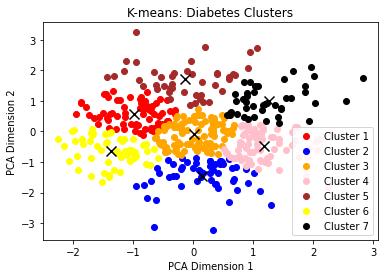

In [343]:
#plot the clusters according to the bar
for i in range(len(kmeans.clusters)):
    centroid, points = list(kmeans.clusters.items())[i]
    
    #define the colours for the clusters
    colours = ['red', 'blue', 'orange', 'pink', 'brown', 'yellow', 'black']
    
    
    #set the colour to the cluser
    colour = colours[i]

    #empty lists to store the x and y coordinates
    x_coord = []
    y_coord = []

    #go through every point in the cluster
    for point in points:
        x_coord.append(point[0]) 
        y_coord.append(point[1])  

    #plot points on scatter plot
    plt.scatter(x_coord, y_coord, color=colour, label='Cluster '+ str(i+1))

    #plot the centroid
    #get x and y of centroid
    centroid_x = centroid[0]
    centroid_y = centroid[1]

    #plot the cent with "X" marker
    plt.scatter(centroid_x, centroid_y, color='black', marker='x', s=100, edgecolors='white')
    
    
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('K-means: Diabetes Clusters')
plt.legend()
plt.show()


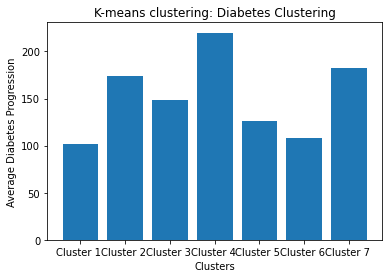

In [344]:
#empty index map
index_map = {}
for i in range(len(pca_data)):
    data_point = pca_data[i]
    tuple_dp = tuple(data_point)
    index_map[tuple_dp] = i

#function to map the cluster points to the original diabetes.data. 
#Eventhough PCA is run, it doesn't alter the order of the diabetes.data and pca_data
#this means the following approach is workable to map clusters to targets
def map_clusters_to_targets(kmeans, target, index_map):
    cluster_targets = {}

    #initialise cluster_targets dict
    for i in range(kmeans.K):
        cluster_targets[i] = []

    #go through the k-means clusters
    for cent in kmeans.clusters.keys():
        cent_point = kmeans.clusters[cent]
        cent_index = None

        #get index of centroid in kmeans.cents
        for i in range(len(kmeans.cents)):
            c = kmeans.cents[i]
            if np.array_equal(c, cent):
                cent_index = i
                break

        #if there's a cent_index, then process accordingly.
        if cent_index is not None:
            for point in cent_point:
                tuple_point = tuple(point)
                if tuple_point in index_map:
                    original_index = index_map[tuple_point]
                    cluster_targets[cent_index].append(target[original_index])

    return cluster_targets

def bar_chart(cluster_targets):
    means = []

    #calculate mean diabetes progression for each cluster
    for cluster_id in cluster_targets:
        values = cluster_targets[cluster_id]
        mean_value = np.mean(values)
        means.append(mean_value)

    #plot bar chart
    cluster_labels = []
    for i in range(len(means)):
        cluster_labels.append('Cluster ' + str(i+1) + ' ')

    plt.bar(range(len(means)), means, tick_label=cluster_labels)
    plt.xlabel('Clusters')
    plt.ylabel('Average Diabetes Progression')
    plt.title('K-means clustering: Diabetes Clustering')
    plt.show()

#use map_clusters_to_targets to link clusters back to original data, 
#get the diabetes progression data then plot on bar chart 
cluster_targets = map_clusters_to_targets(kmeans, diabetes.target, index_map)
bar_chart(cluster_targets)


To categorise the clusters based on their level of risk of diabetes progression, we plot them onto a bar chart, with the y-axis being the mean diabetes progression of the clusters and the x-axis being the clusters. From the chart we can see which cluster has the highest mean diabetes progression. This cluster is the highest risk category of patients as grouped by our K-means algorithm. 

## Explanation of Hierachical Agglomerative Clustering

Now for the purpose of comparison, let's now implement the Hierachical Agglomerative Clustering, rather than using K-means clustering.

The Hierarchical Agglomerative Clustering (HAC) algorithm starts with each data point as a single cluster, then looks for the closest or most similar clusters. Then it joins them together, forming bigger clusters.

The process repeats, gradually merging smaller clusters into larger ones. This algorithm uses the euclidean distance to measure the distance of the clusers. It also uses the "ward" linkage methodology, which is good for making clusters that are not too different in size. 

Then the algorithm builds the hierarchy of clusters, just like a tree. This begins from the bottom, with each point and goes up, forming bigger branches. In the end, we get a few big clusters made from joining all small ones. This stops when we have reached the number of clusters that have been specified, in our project, it is 7.

In this project, we will use the AgglomerativeClustering from the sklearn library to implement the algorithm. We then plot the result on a scatter plot and bar chart, similar what we had implemented for K-means clustering. We then compare the results:
***



hc_labels data:
[5 0 1 0 0 3 3 4 1 1 3 1 0 1 6 4 0 2 1 0 3 3 0 5 1 1 3 1 0 1 0 0 5 0 3 6 0
 0 2 1 2 3 1 6 5 1 3 3 0 5 1 1 0 0 0 0 1 3 6 4 3 5 0 0 1 5 5 1 1 3 0 2 4 2
 2 1 5 3 1 0 4 2 6 3 0 0 3 6 1 0 0 4 0 0 0 1 5 2 1 0 0 0 6 2 0 1 3 2 5 2 3
 6 0 5 2 2 2 2 2 0 1 2 2 4 1 5 3 0 0 2 5 0 2 3 0 1 3 1 5 5 5 2 2 6 2 1 2 2
 0 1 1 0 2 1 2 4 0 2 0 2 0 4 0 5 6 0 3 2 2 2 0 3 2 3 1 0 2 2 6 2 5 6 2 5 1
 1 2 3 4 0 1 1 0 4 1 2 6 5 3 0 6 0 4 2 5 1 2 0 2 5 6 0 0 0 0 5 2 4 0 3 3 0
 1 3 3 5 3 0 0 0 4 0 2 0 2 5 4 0 5 4 5 2 3 1 1 3 6 0 4 2 5 2 2 4 2 0 5 0 2
 0 6 6 5 3 1 1 0 4 2 6 1 1 3 2 0 5 4 3 1 1 2 1 4 3 1 2 0 4 0 2 5 4 0 0 1 1
 0 0 1 1 2 2 2 4 4 1 1 2 3 4 2 4 0 2 0 6 5 4 0 0 4 2 5 2 4 4 5 2 1 1 5 1 5
 5 3 0 4 5 0 4 0 5 5 0 0 2 4 1 0 1 5 3 3 4 4 1 0 1 0 2 1 0 5 5 5 2 2 2 2 1
 0 2 0 3 3 2 4 2 5 3 1 3 5 1 4 1 0 3 1 0 5 3 0 0 5 0 3 1 0 2 0 0 2 1 1 5 0
 2 2 2 2 3 2 0 4 2 1 0 4 3 2 2 4 2 5 3 2 1 2 6 0 1 4 6 0 0 0 5 2 1 2 6]


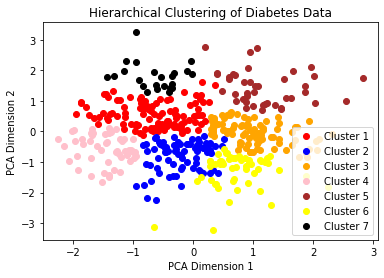

In [345]:
from sklearn.cluster import AgglomerativeClustering

#define the number of clusters
clusters = 7

#generate hierachical clustering
hc = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage='ward')
#run it on the pca data. 
#hc_labels is the list of cluster labels assigned to each data point 
#the pca_data by the hiearchical clustering algorithm
hc_labels = hc.fit_predict(pca_data)

#In agglomerative clustering, each data point starts as its own group. Then
#step by step, the nearest two groups are combined into a bigger group. 
#This joining and combining of the closest groups continues. It goes on until 
#all data points are in one big group or until the desired number of groups is reached.
print("hc_labels data:")
print(hc_labels)


#there is no centroids in the hierarchical clustering, 
#unlike in the K-means clustering plot. Hierarchical clustering 
#does not calculate centroids for clusters as K-means does!


#reset previous chart
plt.figure()

#go through each cluster 
for cluster_ind in range(clusters):
    
    #define the colours for the clusters
    colours = ['red', 'blue', 'orange', 'pink', 'brown', 'yellow', 'black']
    
    #empoty lists to store x and y coordinates of points in this cluster
    x_coord = []
    y_coord = []
    
    

    #go through each point in pca_data
    for i in range(len(pca_data)):
        #check to see if the point belongs to the current cluster
        if hc_labels[i] == cluster_ind:
            #add the x and y coordinates to their respective lists
            x_coord.append(pca_data[i, 0])
            y_coord.append(pca_data[i, 1])

    #plot all points in this cluster with the same colour and label
    plt.scatter(x_coord, y_coord, color=colours[cluster_ind], label='Cluster ' + str(cluster_ind + 1))


plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('Hierarchical Clustering of Diabetes Data')

plt.legend()
plt.show()



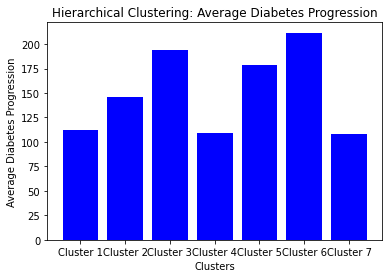

In [346]:
import matplotlib.pyplot as plt
import numpy as np

#get the total 
clusters_total = np.unique(hc_labels).size  

#empty dict to store diabetes progression values for each cluster
cluster_progressions = {}

#zip up the labels to diabetes progression values. 
#Remember, the number of rows are unaffected by PCA
labels_progressions = zip(hc_labels, diabetes.target)

#go through each label and progression value
for label, progression in labels_progressions:
    #if the cluster is not in the dict, add it with an empty list
    if label not in cluster_progressions:
        cluster_progressions[label] = []
    #append the diabetes value to the respective cluster
    cluster_progressions[label].append(progression)

#calculate the mean diabetes progression for each cluster
cluster_means = []
for cluster_id in range(clusters_total):
    #calculate the mean for the current cluster
    mean_value = np.mean(cluster_progressions[cluster_id])
    cluster_means.append(mean_value)

#create cluster labels such as Cluster 1, Cluster 2 etc
cluster_labels = []
for i in range(n_clusters):
    label = 'Cluster ' + str(i+1)
    cluster_labels.append(label)

#plot bar chart
plt.bar(cluster_labels, cluster_means, color='blue')

plt.xlabel('Clusters')
plt.ylabel('Average Diabetes Progression')
plt.title('Hierarchical Clustering: Average Diabetes Progression')
plt.show()


From the bar chart for HAC, we can see which cluster has the highest level of risk of diabetes progression. 

It is important to note that the Cluster 1 does not equal the same data points in Cluster 1 of K-means. All we are interested in looking at is the cluster with the highest mean diabetes progression and then compare the averages of the features of that cluster of HAC and that of the cluster of K-means.

In [348]:
import pandas as pd
#below set of code gets the mean profile for the highest risk cluster from k-means

#function to find the highest progression cluster
def find_highest_progression_cluster(cluster_targets):
    max_average = -1
    cluster_id_with_max_average = -1

    #go through every cluster to find out which one has the highest average
    for cluster_id, values in cluster_targets.items():
        average_value = np.mean(values)
        if average_value > max_average:
            max_average = average_value
            cluster_id_with_max_average = cluster_id

    return cluster_id_with_max_average

#function to generate the cluster profile of means of features 
#once we know which cluster_id has the highest amount (which will be cluster_id)
def create_cluster_profile(kmeans, cluster_id, data, index_map):
    cluster_profile = {}

    #get all of the coordinates (tuples) of the specified cluster
    points_in_cluster = kmeans.clusters[tuple(kmeans.cents[cluster_id])]

    #link points in the cluster back to their original indices    
    original_indices = []
    for point in points_in_cluster:
        #convert the point to a tuple (coordinates)
        point_as_tuple = tuple(point)

        #use the tuple to get the original index of the point from index_map
        original_index = index_map[point_as_tuple]

        #add this original index to the original_indices list
        original_indices.append(original_index)

    #calculate the mean of each original feature for the original points
    for feature_idex in range(data.shape[1]):

        #empty list for feature_values
        feature_values = []
        
        #go through each index in original_indices
        for i in original_indices:
            #get the value of the specified feature for this data point
            feature_value = data[i][feature_idex]

            #add this value to the feature_values list
            feature_values.append(feature_value)

        cluster_profile[feature_idex] = np.mean(feature_values)

    return cluster_profile

#get the cluster with highest average diabetes progression
highest_progression_cluster_id = find_highest_progression_cluster(cluster_targets)

#create profile for the cluster using the original data and index map
cluster_profile = create_cluster_profile(kmeans, highest_progression_cluster_id, diabetes.data, index_map)


#display result

#create empty list to store each feature's name and mean value
data_for_df = []

#go through the cluster profile items
for feature_index, mean_value in cluster_profile.items():
    feature_name = diabetes.feature_names[feature_index]
    #append dict with the feature name and its mean value to the list
    data_for_df.append({'Feature': feature_name, 'Mean Value': mean_value})

#convert to pandas
cluster_profile_df = pd.DataFrame(data_for_df)

#displkay table
print("Cluster Profile for Cluster with Highest Diabetes Progression (Highest Risk):")
print(cluster_profile_df)



Cluster Profile for Cluster with Highest Diabetes Progression (Highest Risk):
  Feature  Mean Value
0     age    0.022190
1     sex    0.030345
2     bmi    0.034550
3      bp    0.037358
4      s1    0.023308
5      s2    0.021433
6      s3   -0.040946
7      s4    0.053035
8      s5    0.046164
9      s6    0.045756


In [349]:
#below set of code gets the mean profile for the highest risk 
#cluster from hierachical clustering

#function to find the highest progression cluster
def find_highest_progression_cluster_hc(cluster_means):
    #get index of the cluster with highest mean
    #argmax gets the index with the highest value
    highest_progression_cluster_id = np.argmax(cluster_means)
    return highest_progression_cluster_id

#input the cluster_means of HC 
highest_progression_cluster_id_hc = find_highest_progression_cluster_hc(cluster_means)


In [350]:
#function to create the profile for the highest risk cluster
def create_cluster_profile_hc(hc_labels, cluster_id, data, target):
    cluster_profile = {}


    #initialise empty list for indices_in_cluster
    indices_in_cluster = []

    #go through each index and corresponding label in hc_labels
    for index, label in enumerate(hc_labels):
        #check if the label matches the cluster_id, which is the input value
        if label == cluster_id:
            #add the index to the indices_in_cluster list
            indices_in_cluster.append(index)


    #calculate mean of each original feature for these points
    for feature_index in range(data.shape[1]):

        #initialise an empty list for feature_values
        feature_values = []

        #go through each index in indices_in_cluster
        for index in indices_in_cluster:
            #get value of the specific feature for this data point
            #remember, indices_in_cluster contains the original indices of datapoints 
            #in the highest cluster
            feature_value = data[index][feature_index]

            #add value to the feature_values list
            feature_values.append(feature_value)

        cluster_profile[feature_index] = np.mean(feature_values)

    return cluster_profile

#create profile for the highest progression cluster
cluster_profile_hc = create_cluster_profile_hc(hc_labels, highest_progression_cluster_id_hc, diabetes.data, diabetes.target)


#display the profile with DF
#empty list to hold data for DF
data_for_df = []

#go through the cluster profile items
for feature_index, mean_value in cluster_profile_hc.items():
    #getthe feature name using the feature index
    feature_name = diabetes.feature_names[feature_index]
    #create a dictionary with the feature name and mean value and add it to the list
    data_row = {'Feature': feature_name, 'Mean Value': mean_value}
    data_for_df.append(data_row)

#convert the list of dictionaries to a DF
cluster_profile_df = pd.DataFrame(data_for_df)

#display table
print("Cluster Profile for Highest Diabetes Progression (Hierarchical Clustering):")
print(cluster_profile_df)



Cluster Profile for Highest Diabetes Progression (Hierarchical Clustering):
  Feature  Mean Value
0     age    0.019091
1     sex    0.039889
2     bmi    0.037557
3      bp    0.039801
4      s1   -0.020157
5      s2   -0.016463
6      s3   -0.048333
7      s4    0.029512
8      s5    0.032537
9      s6    0.031278


## Results

The difference in cluster profiling for the highest diabetes progression risk from both K-means and Hierachical Clustering algorithms show interesting differences and similarities that could help us understand diabetes progression better.

Both algorithms identified similar trends in several features, such as age, sex, bmi, and bp, where the mean values are relatively close. This consistency across different clustering approaches shows that these features might be crucial factors in assessing the risk of diabetes progression.

It is important to note that features s1, s2 and s3 are noticeably different in their mean values between the two algorithms. For example, s1 and s2 are negative in Hierahical clustering but positive in K-means. 

The different mean values for certain features could be due to the inner workings of each clustering algorithm. K-means is more likely to form more similar clusters, while the Hierachical Clustering could have formed slightly different groupings. 

Further studies are required to understand why certain features vary between the patient subgroups. Future studies could be important to help scientific researchers understand how we could design more effective treatment strategies for the most at-risk group of patients.

## Conclusion

The results show the importance of utilising multiple data analysis techniques in the field of medical science research. Each different method could show different aspects of the dataset and illustrate a better picture of complex and potentially dangerous medical conditions such as diabetes. 

The comparative analysis of K-means and Hierachical Clustering shows valuable insights into diabetes progression. It highlights the importance of using different analytical techniques and better understand and avoid bias to understand the multifaceted nature of diabetes progression.




## References

scikit-learn developers (n.d.) 2.3 Clustering. Available at: https://scikit-learn.org/stable/modules/clustering.html [Accessed: 7 January 2024]

scikit-learn developers (n.d.) 2.5. Decomposing signals in components (matrix factorization problems). Available at: https://scikit-learn.org/stable/modules/decomposition.html#pca [Accessed: 7 January 2024]

scikit-learn developers (n.d.) sklearn.cluster.KMeans. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html [Accessed: 7 January 2024]

scikit-learn developers (n.d.) sklearn.cluster.AgglomerativeClustering. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html [Accessed: 7 January 2024]

scikit-learn developers (n.d.) sklearn.datasets.load_diabetes. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html [Accessed: 7 January 2024]